# Clustering Yelp Restaurants

**Part 1: To be completed INDIVIDUALLY and due on October 13 at 5pm.**

In this assignment, we will be working with the [Yelp dataset](https://www.yelp.com/dataset/challenge). Download the data from Round 10. You can find the format of the dataset [here](https://www.yelp.com/dataset/documentation/json).

From the Business Objects, let's try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You may want to use only a subset (15-20) of popular categories.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

In [1]:
import numpy as np
import scipy as sp
import json
import pandas as pd
import collections
import sklearn.metrics as metrics
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_json('/Users/yuchenyuan/Documents/BU/CS506/f2017-hw2-1-Angelalalahhh/business.json', lines=True)
# create a list to store all restaurants in Las Vegas
R = []
# iterate over df to get all restaurants in Las Vegas
for row in df.itertuples():
    if 'Restaurants' in row.categories and row.city == 'Las Vegas':
        R.append([row.longitude, row.latitude, row.categories])
# new dataframe for all restaurants in Las Vegas
restaurants = pd.DataFrame(R, columns = ['longitude', 'latitude', 'categories'])

# create a dictionary to store categories and counts
D = {}
# iterate over restaurants to aggregate categories and counts
for row in restaurants.itertuples():
    for c in row.categories:
        if c != 'Restaurants' and c not in D:
            D[c] = 1
        elif c != 'Restaurants':
            D[c] += 1
C = collections.Counter(D)
Top20 = C.most_common(20) # get the top 20 most popular categories
print Top20

[(u'Food', 1117), (u'Fast Food', 847), (u'Nightlife', 764), (u'American (Traditional)', 739), (u'Mexican', 724), (u'Bars', 720), (u'Sandwiches', 621), (u'Pizza', 587), (u'American (New)', 555), (u'Burgers', 505), (u'Chinese', 410), (u'Breakfast & Brunch', 390), (u'Italian', 370), (u'Japanese', 325), (u'Seafood', 308), (u'Asian Fusion', 247), (u'Sushi Bars', 245), (u'Cafes', 221), (u'Chicken Wings', 216), (u'Steakhouses', 216)]


I will cluster for Chinese, Italian and Steakhouses because these are my favorite types of food and there will be a very small probability for a restaurant to have more than one of these categories.

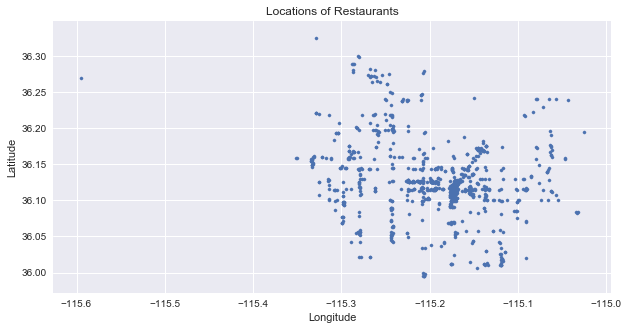

In [2]:
# create a list to store all restaurants in Las Vegas with categories Chinese, Italian or Steakhouses
L = []
# iterate over df to get all restaurants in Las Vegas with categories Chinese, Italian or Steakhouses
for row in restaurants.itertuples():
    l = [0, 0, 0]
    if 'Restaurants' in row.categories:
        if 'Chinese' in row.categories or 'Italian' in row.categories or 'Steakhouses' in row.categories:
            if 'Chinese' in row.categories:
                l[0] = 1
            if 'Italian' in row.categories:
                l[1] = 1
            if 'Steakhouses' in row.categories:
                l[2] = 1
            L.append(list(row)[1:-1] + l)
# new dataframe for all restaurants in Las Vegas with categories Chinese, Italian or Steakhouses
CIS = pd.DataFrame(L, columns = ['longitude', 'latitude', 'Chinese', 'Italian', 'Steakhouses'])
X = np.asarray(L)
plt.figure(figsize=(10,5))
_ = plt.scatter(X[:, 0], X[:, 1], s = 10)
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

** Clustering with KMeans **

In [18]:
# multiply longitude and latitude by 10 for scaling
Y = [[row[0]*10, row[1]*10, row[2], row[3], row[4]] for row in X]
Y = np.asarray(Y)

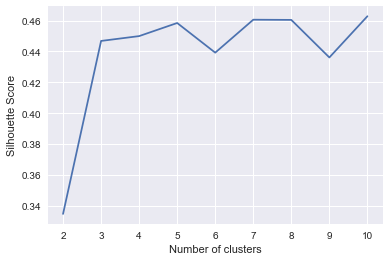

In [30]:
from sklearn.cluster import KMeans
# the below function evaluates the silhouette scores and is referenced from professor Crovella's lecture notes
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
sc_evaluate_clusters(Y,10)

Local maximum is found at 5 clusters.

In [31]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit_predict(Y)

array([4, 1, 3, 3, 4, 4, 3, 0, 4, 0, 4, 4, 4, 2, 0, 3, 2, 3, 2, 4, 1, 4, 3,
       1, 0, 1, 2, 4, 4, 2, 0, 2, 4, 3, 2, 1, 0, 0, 1, 4, 3, 4, 4, 0, 4, 1,
       4, 1, 0, 4, 4, 1, 3, 4, 4, 3, 4, 3, 0, 0, 3, 1, 3, 1, 4, 3, 4, 4, 4,
       1, 3, 3, 4, 0, 3, 3, 1, 0, 1, 3, 0, 3, 1, 4, 4, 4, 4, 1, 3, 4, 0, 4,
       4, 3, 3, 1, 4, 1, 4, 2, 3, 3, 3, 1, 4, 0, 0, 3, 4, 4, 1, 4, 4, 2, 0,
       2, 4, 1, 3, 4, 4, 4, 1, 1, 3, 2, 1, 4, 3, 4, 4, 4, 4, 3, 1, 4, 0, 4,
       1, 4, 1, 0, 3, 4, 3, 3, 4, 1, 2, 3, 3, 4, 4, 3, 0, 1, 0, 4, 2, 2, 4,
       1, 2, 3, 2, 3, 1, 4, 3, 3, 2, 1, 3, 0, 4, 1, 0, 3, 1, 2, 2, 3, 2, 1,
       0, 4, 0, 2, 3, 1, 1, 3, 3, 4, 2, 0, 0, 1, 2, 1, 0, 4, 1, 0, 2, 3, 4,
       2, 3, 3, 1, 4, 1, 4, 0, 4, 4, 1, 4, 3, 4, 0, 4, 3, 4, 0, 4, 2, 2, 4,
       3, 1, 3, 1, 4, 4, 3, 1, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 4, 4, 3, 2, 0,
       2, 3, 1, 4, 1, 2, 4, 3, 1, 3, 2, 0, 3, 0, 4, 3, 3, 3, 4, 1, 1, 1, 0,
       4, 2, 2, 3, 3, 3, 2, 0, 3, 4, 4, 4, 1, 4, 1, 4, 2, 1, 4, 4, 3, 3, 3,
       4, 3,

In [32]:
centroids = kmeans.cluster_centers_
error = kmeans.inertia_
print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')
print(labels)
print('\nCluster centroids:')
print(centroids)

The total error of the clustering is: 436.277797293.

Cluster labels:
[4 1 3 3 4 4 3 0 4 0 4 4 4 2 0 3 2 3 2 4 1 4 3 1 0 1 2 4 4 2 0 2 4 3 2 1 0
 0 1 4 3 4 4 0 4 1 4 1 0 4 4 1 3 4 4 3 4 3 0 0 3 1 3 1 4 3 4 4 4 1 3 3 4 0
 3 3 1 0 1 3 0 3 1 4 4 4 4 1 3 4 0 4 4 3 3 1 4 1 4 2 3 3 3 1 4 0 0 3 4 4 1
 4 4 2 0 2 4 1 3 4 4 4 1 1 3 2 1 4 3 4 4 4 4 3 1 4 0 4 1 4 1 0 3 4 3 3 4 1
 2 3 3 4 4 3 0 1 0 4 2 2 4 1 2 3 2 3 1 4 3 3 2 1 3 0 4 1 0 3 1 2 2 3 2 1 0
 4 0 2 3 1 1 3 3 4 2 0 0 1 2 1 0 4 1 0 2 3 4 2 3 3 1 4 1 4 0 4 4 1 4 3 4 0
 4 3 4 0 4 2 2 4 3 1 3 1 4 4 3 1 1 1 2 1 2 0 3 3 0 0 4 4 3 2 0 2 3 1 4 1 2
 4 3 1 3 2 0 3 0 4 3 3 3 4 1 1 1 0 4 2 2 3 3 3 2 0 3 4 4 4 1 4 1 4 2 1 4 4
 3 3 3 4 3 0 1 3 3 3 0 4 3 1 3 4 0 4 4 4 3 0 4 2 3 0 3 4 3 1 4 3 4 0 4 3 4
 3 1 1 3 2 4 3 1 2 2 3 2 3 4 2 4 4 2 2 0 0 0 2 2 3 0 4 4 4 2 4 2 4 3 2 1 4
 3 1 3 3 1 4 4 3 2 4 0 4 4 4 2 4 0 3 3 2 4 4 4 1 4 2 2 4 4 3 1 4 4 2 1 4 4
 1 4 2 0 4 0 4 0 1 4 3 4 4 4 1 3 3 0 4 4 3 4 4 3 0 4 0 2 3 0 1 4 0 3 2 1 4
 4 3 1 4 4 4 4 0 3 1 4 0 3 0 3

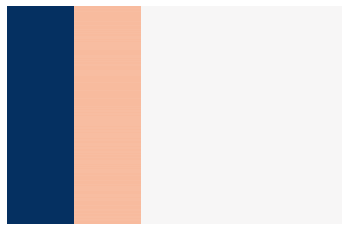

In [33]:
euclidean_dists = metrics.euclidean_distances(Y)
idx = np.argsort(labels)
rX = Y[idx,:]
_ = sns.heatmap(rX, xticklabels=False, yticklabels=False, linewidths=0,cbar=False)

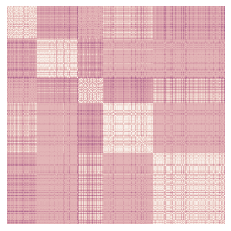

In [34]:
rearranged_dists = euclidean_dists[idx,:][:,idx]
sns.heatmap(rearranged_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

The heatmap shows the 5 clusters in white squares.

** Clustering with hierarchical **

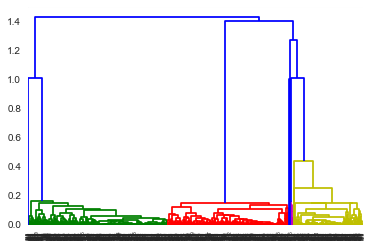

In [9]:
# before scaling longitude and latitude
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
# here I chose average linkage clustering to compromise between the sensitivity of complete-link clustering
# to outliers and the tendency of single-link clustering to form long chains that do not correspond to the
# intuitive notion of clusters as compact, spherical objects.
Z = hierarchy.linkage(X,method='average')
R = hierarchy.dendrogram(Z)

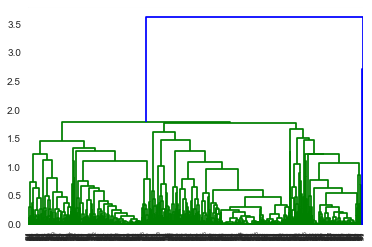

In [10]:
# after scaling longitude and latitude
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
# here I chose average linkage clustering to compromise between the sensitivity of complete-link clustering
# to outliers and the tendency of single-link clustering to form long chains that do not correspond to the
# intuitive notion of clusters as compact, spherical objects.
Z = hierarchy.linkage(Y,method='average')
R = hierarchy.dendrogram(Z)

** Clustering with GMM **

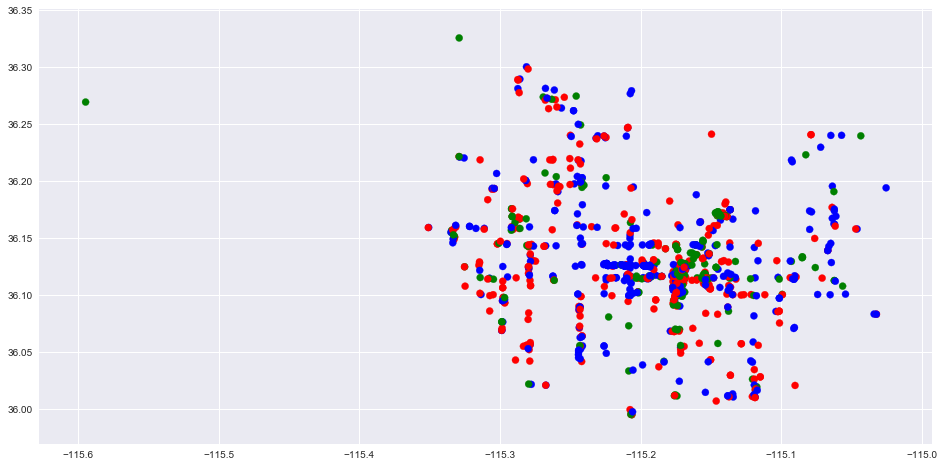

In [11]:
# before scaling longitude and latitude
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
y_pred = gmm.predict(X)
colors = ['rbg'[p] for p in y_pred]
plt.figure(figsize=(16,8))
_ = plt.scatter(X[:, 0], X[:, 1], color=colors, s=50)

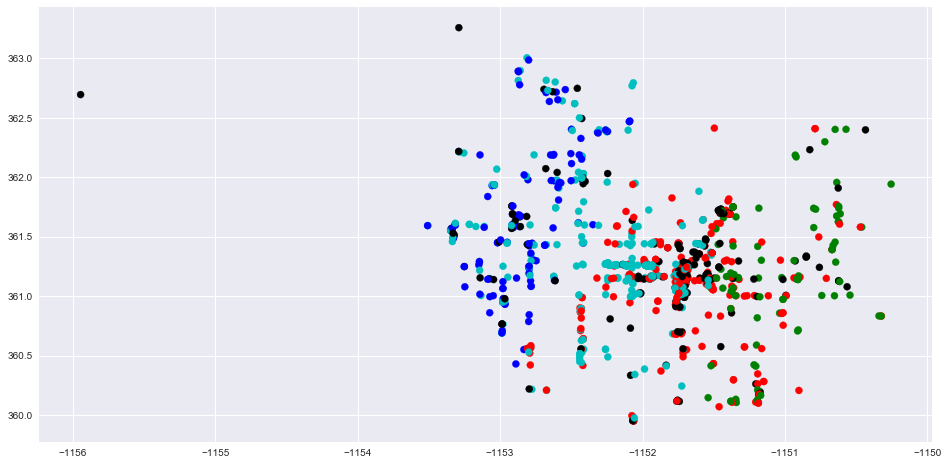

In [35]:
# after scaling longitude and latitude
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5, covariance_type='tied')
# here I chose tied as covariance type because I want the clusters to have roughly the same shapes
gmm.fit(Y)
y_pred = gmm.predict(Y)
colors = ['rbgck'[p] for p in y_pred]
plt.figure(figsize=(16,8))
_ = plt.scatter(Y[:, 0], Y[:, 1], color=colors, s=50)

Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(10 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

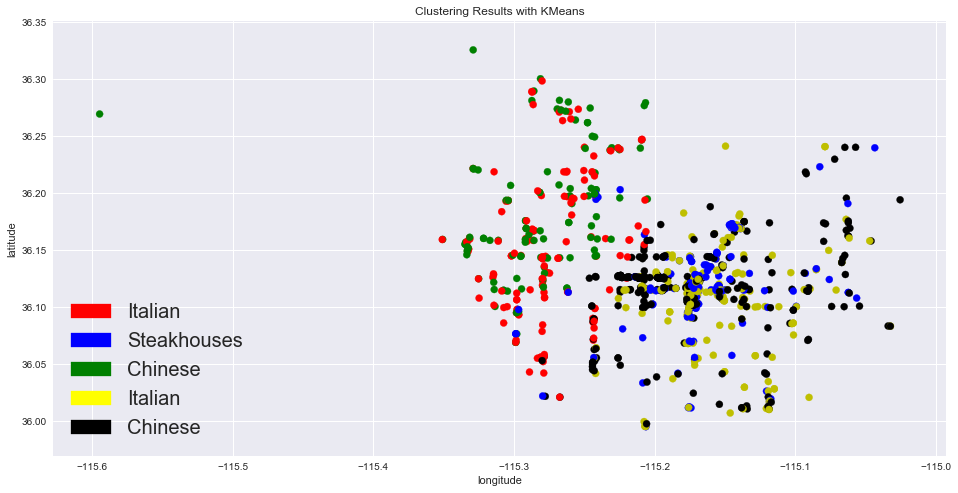

In [39]:
import matplotlib.patches as mpatches
colors = ['rbgyk'[p] for p in labels]
plt.figure(figsize=(16,8))
red_patch = mpatches.Patch(color='red', label='Italian')
blue_patch = mpatches.Patch(color='blue', label='Steakhouses')
green_patch = mpatches.Patch(color='green', label='Chinese')
yellow_patch = mpatches.Patch(color='yellow', label='Italian')
black_patch = mpatches.Patch(color='black', label='Chinese')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with KMeans')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(X[:, 0], X[:, 1], color=colors, s=50)

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

In [41]:
from scipy.spatial import distance
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for i in range(len(Y)):
    if labels[i] == 0:
        cluster1.append(list(Y[i]))
    elif labels[i] == 1:
        cluster2.append(list(Y[i]))
    elif labels[i] == 2:
        cluster3.append(list(Y[i]))
    elif labels[i] == 3:
        cluster4.append(list(Y[i]))
    else:
        cluster5.append(list(Y[i]))

# get centroid for each cluster
centroid1 = centroids[0]
centroid2 = centroids[1]
centroid3 = centroids[2]
centroid4 = centroids[3]
centroid5 = centroids[4]
# initialize outliers for each cluster to be the first entry
outlier1 = cluster1[0]
outlier2 = cluster2[0]
outlier3 = cluster3[0]
outlier4 = cluster4[0]
outlier5 = cluster5[0]
# initialize distance from farthest point to centroid for each cluster to be 0
dst1 = 0
dst2 = 0
dst3 = 0
dst4 = 0
dst5 = 0
# cluster 1
for i in range(len(cluster1)):
    dst = distance.euclidean(cluster1[i], centroid1)
    if dst > dst1:
        dst1 = dst
        outlier1 = cluster1[i]

# cluster 2
for i in range(len(cluster2)):
    dst = distance.euclidean(cluster2[i], centroid2)
    if dst > dst2:
        dst2 = dst
        outlier2 = cluster2[i]

# cluster 3
for i in range(len(cluster3)):
    dst = distance.euclidean(cluster3[i], centroid3)
    if dst > dst3:
        dst3 = dst
        outlier3 = cluster3[i]
        
# cluster 4
for i in range(len(cluster4)):
    dst = distance.euclidean(cluster4[i], centroid4)
    if dst > dst4:
        dst4 = dst
        outlier4 = cluster4[i]
        
# cluster 5
for i in range(len(cluster5)):
    dst = distance.euclidean(cluster5[i], centroid5)
    if dst > dst5:
        dst5 = dst
        outlier5 = cluster5[i]

print '\tOutliers\t\t\t\t\t\tDistances'
print outlier1, '\t' + str(dst1)
print outlier2, '\t\t' + str(dst2)
print outlier3, '\t' + str(dst3)
print outlier4, '\t\t' + str(dst4)
print outlier5, '\t\t' + str(dst5)

	Outliers						Distances
[-1152.7998279999999, 362.98515700000002, 0.0, 1.0, 0.0] 	1.44552298067
[-1150.4346, 362.39820000000003, 0.0, 0.0, 1.0] 		1.73246275445
[-1155.9456600000001, 362.69478999999995, 0.0, 0.0, 1.0] 	3.42846457566
[-1152.069481, 359.95317499999999, 0.0, 1.0, 1.0] 		1.56817379257
[-1150.57124864, 362.40260793300001, 1.0, 0.0, 0.0] 		1.70640094238


The outlier for cluster 3 is farthest from its centroid, which makes sense because cluster 3 is labeled as green, and we can see from the previous graph that the green dot on the top left is much farther than all other points.
Notice that the outlier for cluster 3 is actually a restaurant with category Steakhouses, but it was clustered into cluster 3 which has mostly Chinese restaurants. This means that we put more weight on location (longitude and latitude) than categories when we were clustering. The results make sense because we did feature scaling.

Give a detailed analysis comparing the results you obtained from the 3 techniques. **(10 pts)**

When clustering with Hierarchical, I chose average linkage clustering to compromise between the sensitivity of complete-link clustering to outliers and the tendency of single-link clustering to form long chains that do not correspond to the intuitive notion of clusters as compact, spherical objects. The clustering result without scaling longitude and latitude clearly showed 3 clusters, based on food types. The result with scaling seem to show 3 big clusters and 5-7 small clusters even though it is kind of hard to tell, but this corresponds with the silhouette scores we obtained.

When clustering with GMM, I first tried the full type with unscaled data, and the results seem to be just based on food types and showing us which restaurants serve Chinese, Italian, or steaks. Then I clustered the scaled data with type tied because I want the clusters to have roughly the same shapes. The results show clusters of different sizes overlapping on each other, and I wanted to see more distinct clusters.

The results from KMeans made the most sense to me. If we observe the centroids:

Cluster centroids:

[[ -1.15274560e+03   3.61540670e+02   4.44089210e-16   ** 1.00000000e+00 **
    7.24637681e-03]
    
 [ -1.15167700e+03   3.61191880e+02   1.63043478e-02   4.89130435e-02
    ** 1.00000000e+00 **]
    
 [ -1.15280483e+03   3.61824226e+02   ** 7.52212389e-01 **   2.77555756e-16
    ** 2.47787611e-01 **]
    
 [ -1.15158718e+03   3.61072728e+02   4.99600361e-16   ** 1.00000000e+00 **
    1.35135135e-02]
    
 [ -1.15173789e+03   3.61157315e+02   ** 1.00000000e+00 **   3.10559006e-03
    6.10622664e-16]]

We can see that clusters 1, 2, 4, and 5 all have centroids clearly indicating their categories. The order of the last three features are Chinese, Italian, and Steakhouses. A value of 1 indicates that the centroid belongs to the correponding category. Cluster 3 has 0.75 for Chinese and 0.25 for Steakhouses, so I labeled it as Chinese. Overall, this gives us a pretty good sense of the different culinary districts based on the three categories we chose, as seen in the previous graph.

----------